In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [2]:
def read_data(dir_path, file_prefix, r):
    file_path = os.path.join(dir_path, '{}_{}.csv'.format(file_prefix, r))
    with open(file_path, 'r') as f:
        data = np.fromstring(f.read().strip(), sep=',').astype('int32')
    
    return data

## Standard deviation of market attendances

[]

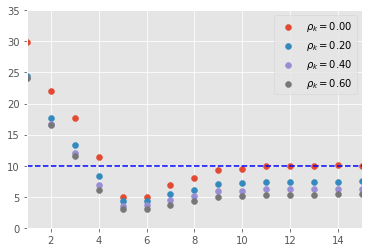

In [17]:
# Parameters
s = 2
p = 16
eps = 0
rhok = 0.6
n_minority_agents = 101
n_producer_agents = 0
n_speculator_agents = 0
n_agents = n_minority_agents + n_producer_agents + n_speculator_agents + n_spy_agents
n_iters = 50000
n_runs = 1

start_timestep = 30000

for rhok in [0, 0.2, 0.4, 0.6]:
    if rhok == 0:
        n_spy_agents = 0
    else:
        n_spy_agents = 10
    xs, ys = [], []
    for p in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]:
        # Read data
        dir_path = '../simulation_results/s{}_p{}_eps{:.2f}_rhok{:.2f}_nmins{}_npros{}_nspes{}_nspys{}_niters{}_nruns{}/'.format(
            s, p, eps, rhok, n_minority_agents, n_producer_agents, n_speculator_agents, n_spy_agents, n_iters, n_runs)
        attendance_history = read_data(dir_path, 'excess_demand_history', 0)

        xs.append(np.log2(p))
        ys.append(np.std(attendance_history))

    xs = np.array(xs)
    ys = np.array(ys)

    plt.scatter(xs, ys, label=r'$\rho_k = {:.2f}$'.format(rhok))

plt.plot(np.arange(1, 16), np.full(15, 10), '--', color='blue')

plt.xlim(1, 15)
plt.ylim(0, 35)

plt.legend()

plt.plot()